### Compute sLORETA inverse solution on raw dataset restricted to a brain label and stores the solution in stc files for visualisation.

In [1]:
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_raw,read_inverse_operator

In [3]:
data_path = sample.data_path()
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
fname_raw = data_path + '/MEG/sample/sample_audvis_raw.fif'
label_name = 'Aud-lh'
fname_label = data_path + '/MEG/sample/labels/%s.label' % label_name

In [4]:
snr = 1.0  # use smaller SNR for raw data
lambda2 = 1.0 / snr ** 2
method = "sLORETA"  # use sLORETA method (could also be MNE or dSPM)

In [5]:
# load data
raw = mne.io.read_raw_fif(fname_raw)
inverse_operator = read_inverse_operator(fname_inv)
label = mne.read_label(fname_label)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading inverse operator decomposition from /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation 

In [6]:
raw.set_eeg_reference('average',projection=True) #set average reference
start,stop = raw.time_as_index([0,15]) #read the first 15s of data

Adding average EEG reference projection.
1 projection items deactivated


In [11]:
## compute inverse solution
stc = apply_inverse_raw(raw,inverse_operator,lambda2,method,label,start,stop,pick_ori=None)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (sLORETA)...
[done]
Applying inverse to raw...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    combining the current components...
[done]


In [ ]:
# Save result in stc files
# stc.save('mne_%s_raw_inverse_%s' % (method, label_name))

In [16]:
stc.data.shape

(33, 9009)

In [24]:
stc.data[::100, :].shape

(1, 9009)

In [25]:
len(stc.times)

9009

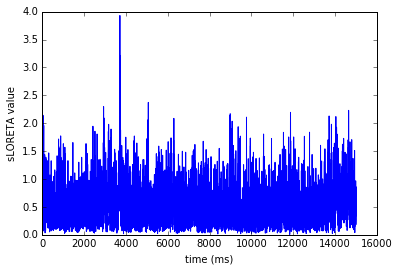

In [21]:
plt.plot(1e3 * stc.times, stc.data[::100, :].T)
plt.xlabel('time (ms)')
plt.ylabel('%s value' % method)
plt.show()